## Step 1: Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

## Step 2: Load + Preprocess Data

In [2]:
# Load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

# Normalize (0–255 → 0–1)
x_train = x_train / 255.0
x_test  = x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


## Step 3: Build Minimal CNN

In [3]:
model = models.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


c:\Users\aayus\Desktop\Study Materials\CV\Experiments\CNN_1\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        86,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,322 (341.10 KB)

 Trainable params: 87,322 (341.10 KB)

 Non-trainable params: 0 (0.00 B)

## Step 4: Compile the Model

In [4]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


## Step 5: Train

In [5]:
history = model.fit(
    x_train, y_train,
    epochs=5,       # Runs very fast
    batch_size=64,
    validation_split=0.1
)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9167 - loss: 0.2959 - val_accuracy: 0.9710 - val_loss: 0.1086
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9699 - loss: 0.1017 - val_accuracy: 0.9803 - val_loss: 0.0727
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9784 - loss: 0.0712 - val_accuracy: 0.9808 - val_loss: 0.0720
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9830 - loss: 0.0552 - val_accuracy: 0.9848 - val_loss: 0.0588
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9867 - loss: 0.0442 - val_accuracy: 0.9828 - val_loss: 0.0640


## Step 6: Evaluate

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9808 - loss: 0.0563
Test Accuracy: 0.9807999730110168


## Step 7: Make Predictions

In [7]:
import numpy as np

sample = x_test[0].reshape(1, 28, 28, 1)
pred = model.predict(sample)
print("Predicted digit:", np.argmax(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted digit: 7


## Graph plot

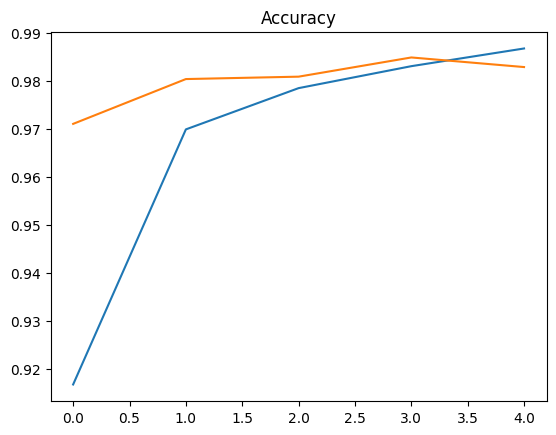

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.show()
